In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ROCAUC

In [2]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# Logistic Regression

In [3]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l2', random_state = 1, multi_class = "multinomial", max_iter = 300, class_weight = 'balanced')

classifier.fit(X_train.values, y_train.values.ravel())

y_pred_train = classifier.predict(X_train.values)
y_pred_test = classifier.predict(X_test.values)

y_pred_train_probs = classifier.predict_proba(X_train.values)
y_pred_test_probs = classifier.predict_proba(X_test.values)

from sklearn.metrics import roc_auc_score
print('ROC-AUC Random Forest train:', roc_auc_score(y_train, y_pred_train_probs, multi_class='ovr'))
print('ROC-AUC Random Forest test:', roc_auc_score(y_test, y_pred_test_probs, multi_class='ovr'))

ROC-AUC Random Forest train: 0.7197731621829577
ROC-AUC Random Forest test: 0.6770461451783633


# Visualising the results

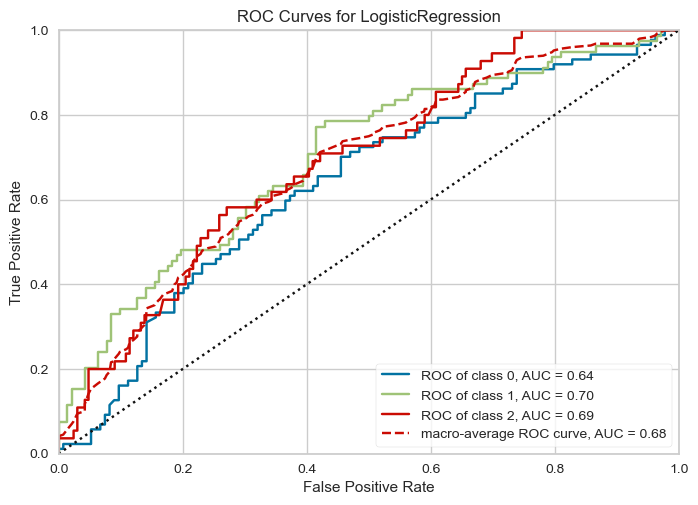

In [10]:
visualizer = ROCAUC(classifier, per_class = True, cmap = "cool", micro = False)

visualizer.fit(X_train.values, y_train)
visualizer.score(X_test.values, y_test)

visualizer.show()
plt.show()